In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv("Datasets/link2/insurance_data.csv")

In [7]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [9]:
df.value_counts()

age  bought_insurance
18   0                   2
19   0                   1
61   1                   1
60   1                   1
58   1                   1
56   1                   1
55   1                   1
     0                   1
54   1                   1
52   0                   1
50   1                   1
49   1                   1
47   1                   1
46   1                   1
45   1                   1
40   1                   1
29   0                   1
28   0                   1
27   0                   1
26   0                   1
25   1                   1
     0                   1
23   0                   1
22   0                   1
21   0                   1
62   1                   1
dtype: int64

In [10]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

<BarContainer object of 27 artists>

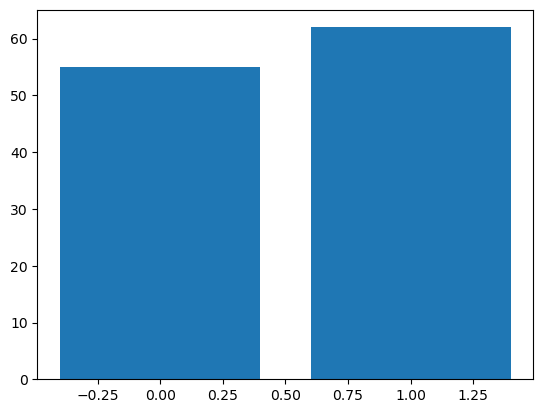

In [12]:
import matplotlib.pyplot as plt
plt.bar(df['bought_insurance'],df['age'])

[Text(0, 0, '0'), Text(1, 0, '1')]

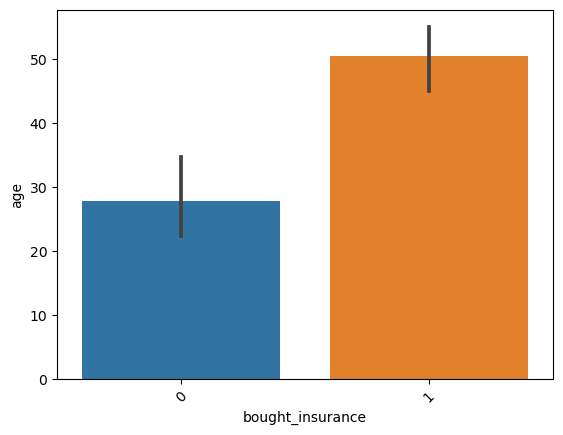

In [14]:
plot = sns.barplot(data = df,x = "bought_insurance",y = "age")#.set_xticklabels(df['Mileage'], rotation=45)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

In [15]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [16]:
df.corr()

,age,bought_insurance
age,1.000000,0.732395
bought_insurance,0.732395,1.000000


In [17]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [18]:
y = df.iloc[:,-1].values
X = df.drop(['bought_insurance'], axis = 1)
X

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [19]:
y= y.reshape(-1,1)

In [20]:
y

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [21]:
X.head()

,age
0,22
1,25
2,47
3,52
4,46


## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [23]:
import matplotlib.pyplot as plt

In [24]:
reg.predict(X).reshape(-1,1)

array([[0.10010227],
       [0.17115409],
       [0.69220073],
       [0.81062042],
       [0.66851679],
       [0.90535618],
       [0.88167224],
       [1.00009193],
       [1.04745981],
       [1.02377587],
       [0.00536652],
       [0.2422059 ],
       [0.21852197],
       [0.26588984],
       [0.73956861],
       [0.88167224],
       [0.17115409],
       [0.95272406],
       [0.02905046],
       [0.00536652],
       [0.07641834],
       [0.19483803],
       [0.52641316],
       [0.64483286],
       [0.76325255],
       [0.8579883 ],
       [0.12378621]])

[Text(0, 0, '0'), Text(1, 0, '1')]

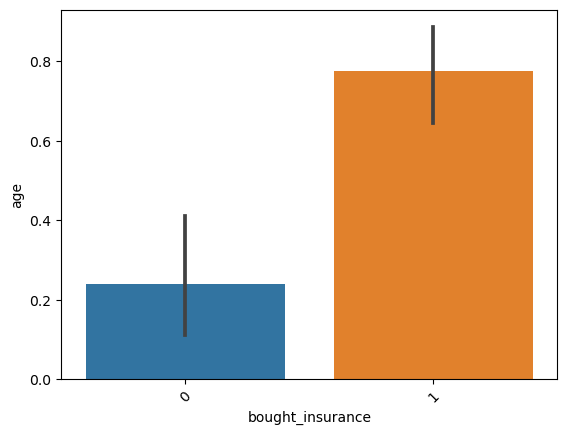

In [28]:
# plot = sns.barplot(x = X["bought_insurance"],y = "age")#.set_xticklabels(df['Mileage'], rotation=45)
plot = sns.barplot(x = df["bought_insurance"],y = pd.DataFrame(reg.predict(X).reshape(-1,1),columns = ['age']).age)#.set_xticklabels(df['Mileage'], rotation=45)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

## Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_poly = poly.fit_transform(X)

polyreg = LinearRegression()
polyreg.fit(X_poly,y)

LinearRegression()

[Text(0, 0, '0'), Text(1, 0, '1')]

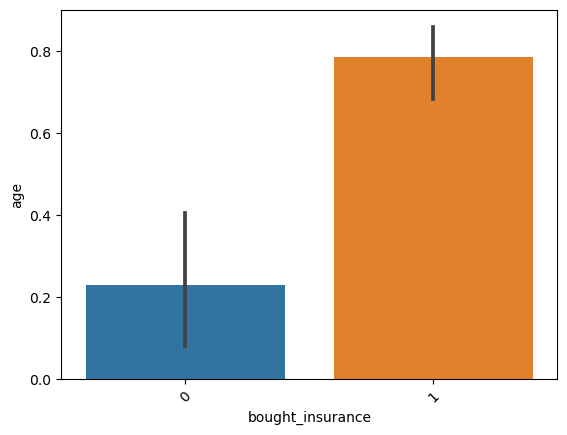

In [30]:
plot = sns.barplot(x = df["bought_insurance"],y = pd.DataFrame(polyreg.predict(X_poly).reshape(-1,1),columns = ['age']).age)#.set_xticklabels(df['Mileage'], rotation=45)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

## Support Vector Machines

In [31]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X,y)

C:\Users\joben\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [32]:
svr.predict(X)

array([0.02612226, 0.02927976, 0.91526873, 0.90665174, 0.90997723,
       0.89911784, 0.8996479 , 0.90149885, 0.89992411, 0.90129481,
       0.10009943, 0.10001942, 0.06862274, 0.13890632, 0.91614178,
       0.8996479 , 0.02927976, 0.90009944, 0.07570063, 0.10009943,
       0.03783704, 0.04502692, 0.7615711 , 0.9002097 , 0.91359373,
       0.90110936, 0.02032896])

[Text(0, 0, '0'), Text(1, 0, '1')]

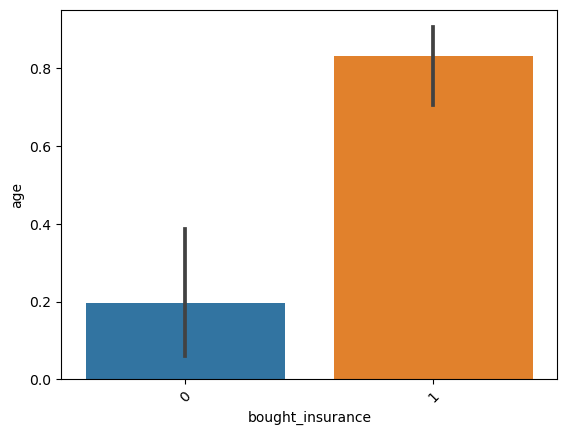

In [34]:
plot = sns.barplot(x = df["bought_insurance"],y = pd.DataFrame(svr.predict(X).reshape(-1,1),columns = ['age']).age)#.set_xticklabels(df['Mileage'], rotation=45)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

## Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X,y)

DecisionTreeRegressor(random_state=0)

[Text(0, 0, '0'), Text(1, 0, '1')]

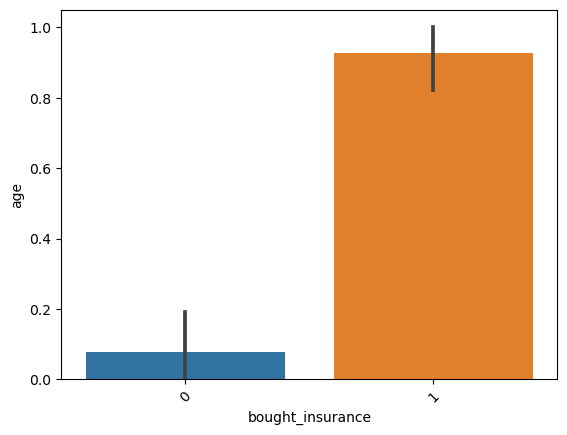

In [37]:
plot = sns.barplot(x = df["bought_insurance"],y = pd.DataFrame(dtr.predict(X).reshape(-1,1),columns = ['age']).age)#.set_xticklabels(df['Mileage'], rotation=45)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

## Lasso-Ridge Regressor

In [38]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha = 3)
ridgeR.fit(X,y)

Ridge(alpha=3)

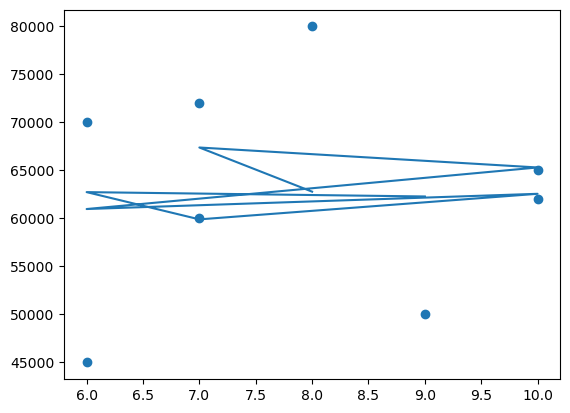

In [55]:
plt.scatter(X['interview_score'],y)
plt.plot(X['interview_score'],ridgeR.predict(X))

[Text(0, 0, '0'), Text(1, 0, '1')]

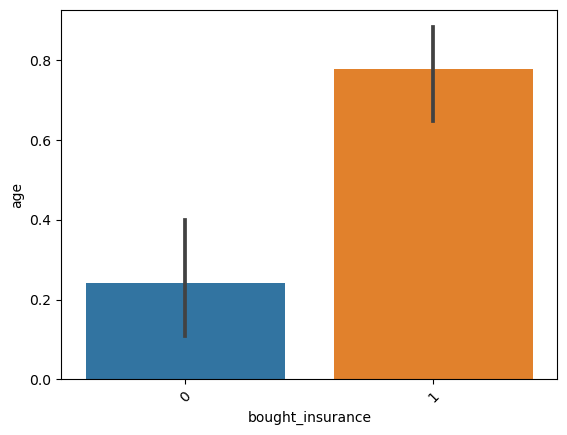

In [40]:
plot = sns.barplot(x = df["bought_insurance"],y = pd.DataFrame(ridgeR.predict(X).reshape(-1,1),columns = ['age']).age)#.set_xticklabels(df['Mileage'], rotation=45)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)